![image-alt-text](imagens/logo.png)

<h2> Modelo de Previsão (Classificação de Score) </h2> </br>
Objetivo: prever faixa de pontuação de crédito para cada cliente. </br> Referência:
https://www.kaggle.com/datasets/parisrohan/credit-score-classification?resource=download&select=train.csv

**Processo da Ciência de Dados**: </br>
1 - Entendimento do Negócio. </br>
2 - Obtenção das Bases de Dados. </br>
3 - Análise Exploratória de Dados. </br>
4 - Contrução do Modelo. </br>
5 - Avaliação do Modelo. </br>

Importação de Pacotes Python

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

Análise Exploratória de Dados (EDA)

In [5]:
# Obtendo os dados
cli_registros = pd.read_csv("bases/train.csv")

In [6]:
cli_registros.shape

(100000, 28)

In [7]:
cli_registros.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
cli_registros.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [9]:
# Tipos de dados
cli_registros.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
cli_registros.head(5)

In [10]:
# Qtde de clientes distintos
len(cli_registros['Customer_ID'].unique())

12500

In [11]:
# Contabilizando valores nulos
cli_registros.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
# Removendo valores nulos
cli_registros = cli_registros.dropna()
cli_registros.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [13]:
print(f"Contagem de amostras após remoção de valores nulos: {len(cli_registros)}")

Contagem de amostras após remoção de valores nulos: 53049


1. Variável MONTh

In [15]:
cli_registros['Month'].head(5)

0      January
6         July
8      January
9     February
10       March
Name: Month, dtype: object

In [14]:
type(cli_registros['Month'])

pandas.core.series.Series

In [16]:
print('Qtde de MESES únicos ',len(cli_registros['Month'].unique()))

Qtde de MESES únicos  8


In [17]:
cli_registros['Month'].unique()

array(['January', 'July', 'February', 'March', 'May', 'June', 'August',
       'April'], dtype=object)

In [18]:
meses_agrupados = cli_registros.groupby('Month').count().loc[:,'ID']
meses_agrupados

Month
April       6609
August      6624
February    6589
January     6744
July        6637
June        6629
March       6568
May         6649
Name: ID, dtype: int64

In [21]:
def pesquisar_elemento(item):
  dic_meses = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8}
  for mes, numero in dic_meses.items():
    if numero == item:
        return mes

In [22]:
# Ordenando o ano
dic_meses = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8}
meses_agrupados.index = [dic_meses.get(item) for item in meses_agrupados.index]
meses_agrupados = meses_agrupados.sort_index()
meses_agrupados

# obtendo o nome do mês novamente
meses_agrupados.index = [pesquisar_elemento(item) for item in meses_agrupados.index]
meses_agrupados.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'],
      dtype='object')

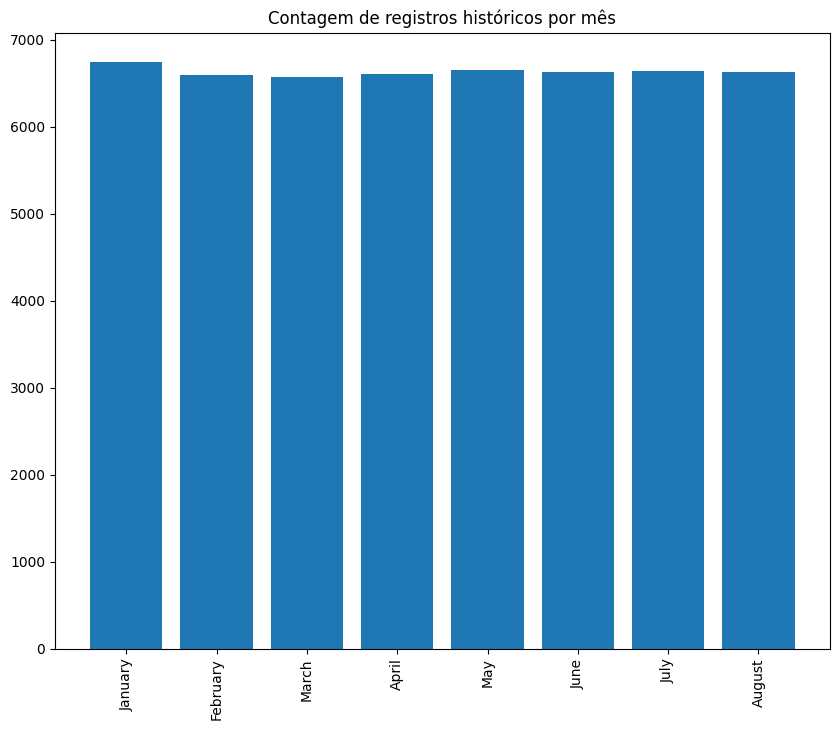

In [23]:
plt.figure(figsize = (10,8))
x = meses_agrupados.index
height = meses_agrupados.values
plt.bar(x, height)
plt.title('Contagem de registros históricos por mês')
plt.xticks(rotation = 90)
plt.show()

2. Variável Occupation

In [25]:
type(cli_registros['Occupation'])

pandas.core.series.Series

In [24]:
cli_registros['Occupation'][0:10]

0     Scientist
6     Scientist
8       _______
9       Teacher
10      Teacher
12      Teacher
13      Teacher
15      Teacher
16      _______
20      _______
Name: Occupation, dtype: object

In [26]:
# Encontrando os valores únicos.
print('Qtde de ocupações únicas únicas ',len(cli_registros['Occupation'].unique()))

Qtde de ocupações únicas únicas  16


In [27]:
cli_registros['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Mechanic', 'Writer', 'Accountant', 'Architect', 'Musician',
       'Developer'], dtype=object)

In [28]:
cli_registros_agrupados = cli_registros.groupby('Occupation').count().loc[:,'ID'].rename("Qtde de amostras")
cli_registros_agrupados

Occupation
Accountant       3305
Architect        3325
Developer        3279
Doctor           3344
Engineer         3321
Entrepreneur     3326
Journalist       3124
Lawyer           3558
Manager          3107
Mechanic         3419
Media_Manager    3306
Musician         3136
Scientist        3281
Teacher          3341
Writer           3150
_______          3727
Name: Qtde de amostras, dtype: int64

In [29]:
cli_registros['Occupation'] = cli_registros['Occupation'].replace(['_______'], 'Desconhecido')

In [34]:
cli_registros_agrupados = cli_registros.groupby('Occupation').count().loc[:,'ID'].rename("Qtde de amostras")
cli_registros_agrupados = cli_registros_agrupados.sort_values(ascending=False)
cli_registros_agrupados

Occupation
Desconhecido     3727
Lawyer           3558
Mechanic         3419
Doctor           3344
Teacher          3341
Entrepreneur     3326
Architect        3325
Engineer         3321
Media_Manager    3306
Accountant       3305
Scientist        3281
Developer        3279
Writer           3150
Musician         3136
Journalist       3124
Manager          3107
Name: Qtde de amostras, dtype: int64

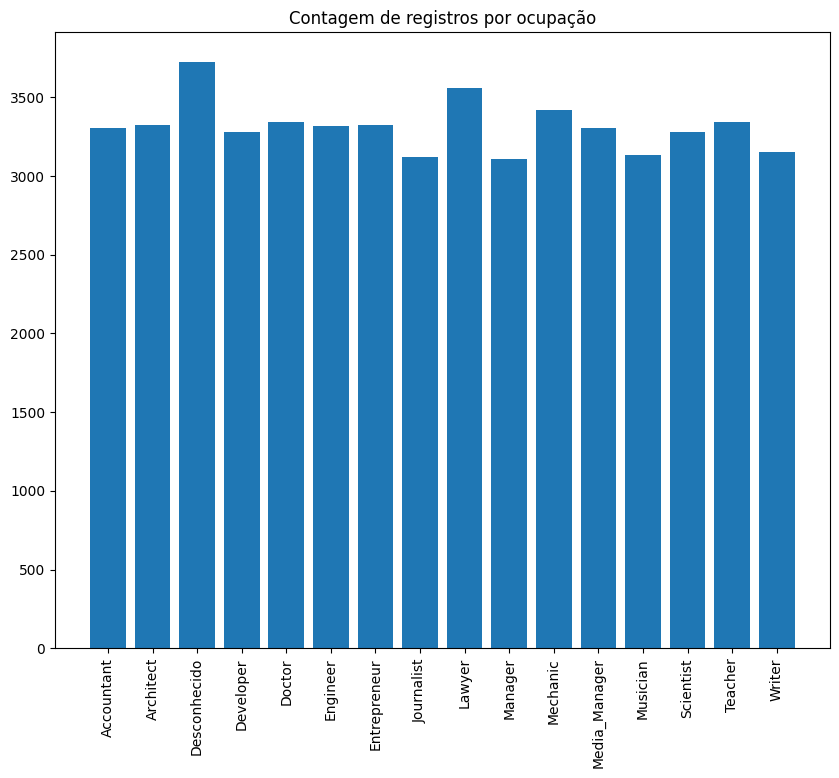

In [31]:
plt.figure(figsize = (10,8))
x = cli_registros_agrupados.index
height = cli_registros_agrupados.values
plt.bar(x, height)
plt.title('Contagem de registros por ocupação')
plt.xticks(rotation = 90)
plt.show()

3. Variável Monthly_Inhand_Salary (Salário Médio Mensal)

In [36]:
type(cli_registros['Monthly_Inhand_Salary'])

pandas.core.series.Series

In [35]:
cli_registros['Monthly_Inhand_Salary'][40:50]

85    2948.605833
86    2948.605833
88    7266.686667
89    7266.686667
90    7266.686667
92    7266.686667
93    7266.686667
96    4766.680000
97    4766.680000
99    4766.680000
Name: Monthly_Inhand_Salary, dtype: float64

In [37]:
cli_registros['Monthly_Inhand_Salary'].describe()

count    53049.000000
mean      4024.502617
std       3094.967739
min        303.645417
25%       1575.345833
50%       2991.016667
75%       5712.553333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [38]:
print('Desvio Padrão ',st.stdev(cli_registros['Monthly_Inhand_Salary']))
print('Média ',st.mean(cli_registros['Monthly_Inhand_Salary']))

Desvio Padrão  3094.9677388924133
Média  4024.502617003084


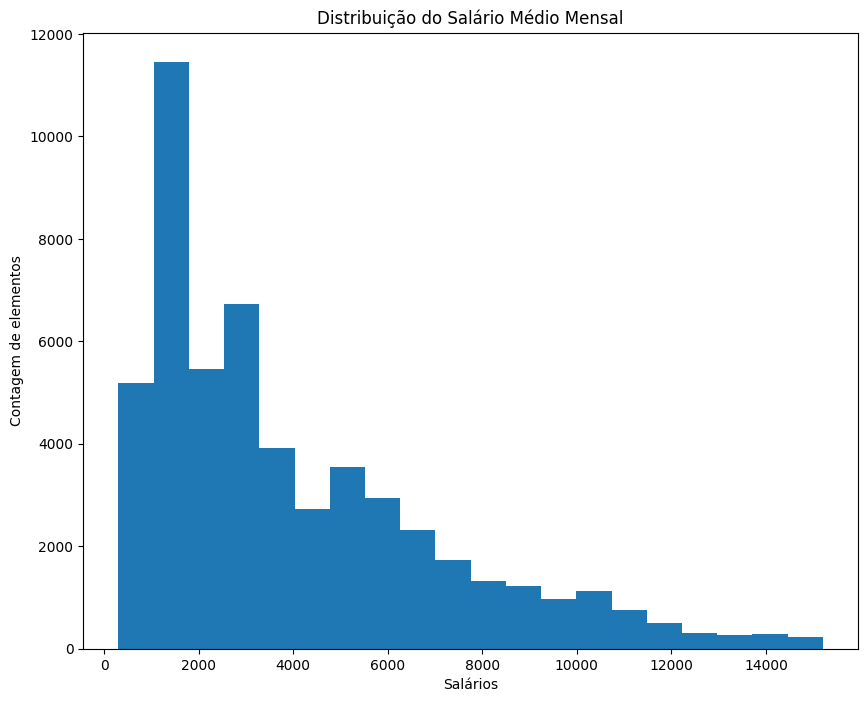

In [39]:
plt.figure(figsize = (10,8))
plt.hist(x = cli_registros['Monthly_Inhand_Salary'],bins = 20, histtype ='bar')
plt.title('Distribuição do Salário Médio Mensal')
plt.ylabel('Contagem de elementos')
plt.xlabel('Salários')
plt.show()

4. Variável Num_Bank_Accounts

In [40]:
type(cli_registros['Num_Bank_Accounts'])

pandas.core.series.Series

In [41]:
cli_registros[['Customer_ID','Name','Num_Bank_Accounts']].head(15)

,Customer_ID,Name,Num_Bank_Accounts
0,CUS_0xd40,Aaron Maashoh,3
6,CUS_0xd40,Aaron Maashoh,3
8,CUS_0x21b1,Rick Rothackerj,2
9,CUS_0x21b1,Rick Rothackerj,2
10,CUS_0x21b1,Rick Rothackerj,2
12,CUS_0x21b1,Rick Rothackerj,2
13,CUS_0x21b1,Rick Rothackerj,2
15,CUS_0x21b1,Rick Rothackerj,2
16,CUS_0x2dbc,Langep,1
20,CUS_0x2dbc,Langep,1


In [42]:
cli_registros['Num_Bank_Accounts'].describe()

count    53049.000000
mean        16.842806
std        115.605025
min         -1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [43]:
cli_registros[cli_registros.Num_Bank_Accounts < 0]#['Num_Bank_Accounts']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,0xc7b8,CUS_0x4f2a,March,Margaretf,39,807-03-5415,Engineer,128305.76,10434.146667,-1,...,Good,1151.7,40.586736,22 Years and 5 Months,No,196.587321,230.9223857499363,High_spent_Large_value_payments,855.9049597507532,Standard
30332,0xc7ba,CUS_0x4f2a,May,Margaretf,40,807-03-5415,Engineer,128305.76,10434.146667,-1,...,Good,1151.7,28.702053,22 Years and 7 Months,No,196.587321,150.0966753535676,High_spent_Large_value_payments,936.7306701471217,Good
30333,0xc7bb,CUS_0x4f2a,June,Margaretf,40,807-03-5415,Engineer,128305.76,10434.146667,-1,...,Good,1151.7,34.808390,22 Years and 8 Months,No,196.587321,1006.6980690205388,Low_spent_Medium_value_payments,120.12927648015079,Good
47212,0x12aa2,CUS_0x43bc,May,Patrick Werrl,36,307-06-8196,Lawyer,22312.07,2013.339167,-1,...,_,51.37,40.402442,23 Years and 7 Months,No,32.891186,__10000__,High_spent_Small_value_payments,341.0972605265373,Good
47214,0x12aa4,CUS_0x43bc,July,Patrick Werrl,36,307-06-8196,Lawyer,22312.07,2013.339167,-1,...,_,51.37,25.649329,23 Years and 9 Months,No,32.891186,148.93275150090662,Low_spent_Large_value_payments,289.5099787959108,Standard
47215,0x12aa5,CUS_0x43bc,August,Patrick Werrl,36,307-06-8196,Lawyer,22312.07,2013.339167,-1,...,Good,51.37,30.059211,23 Years and 10 Months,No,32.891186,23.00309350191133,High_spent_Medium_value_payments,395.43963679490616,Good
55636,0x15bfe,CUS_0x5993,May,Stephensonq,40,120-48-2348,Developer,30352.11,2317.342500,-1,...,Good,644.57,25.532001,23 Years and 9 Months,NM,16.483566,126.66534532381421,Low_spent_Medium_value_payments,368.5853384529692,Standard
55638,0x15c00,CUS_0x5993,July,Stephensonq,41,120-48-2348,Developer,30352.11,2317.342500,-1,...,Good,644.57,26.574175,23 Years and 11 Months,No,16.483566,64.86083753440263,!@9#%8,400.38984624238066,Standard


In [44]:
# Tratando os clientes com -1 de número de contas bancárias para 0.
cli_registros.Num_Bank_Accounts = cli_registros['Num_Bank_Accounts'].replace(-1,0)

In [45]:
cli_registros_agrupados_banco_contas = cli_registros.groupby('Num_Bank_Accounts').count().loc[:,'ID'].rename("Qtde_de_amostras")
cli_registros_agrupados_banco_contas.sort_values(ascending=False)

Num_Bank_Accounts
6       7401
7       7081
8       6924
5       6204
4       6196
        ... 
1168       1
1174       1
1181       1
1182       1
864        1
Name: Qtde_de_amostras, Length: 569, dtype: int64

Mínimo  0.0
25% 4.0
50% 6.0
75% 8.0
Máximo 1798.0
Média 16.842956511904088


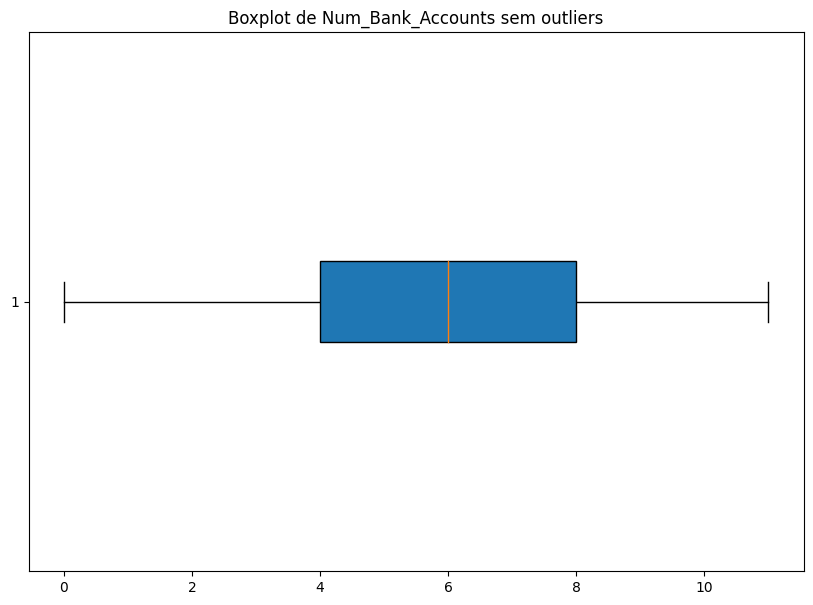

In [46]:
print('Mínimo ',cli_registros['Num_Bank_Accounts'].describe()[3])
print('25%', cli_registros['Num_Bank_Accounts'].describe()[4])
print('50%', cli_registros['Num_Bank_Accounts'].describe()[5])
print('75%', cli_registros['Num_Bank_Accounts'].describe()[6])
print('Máximo', cli_registros['Num_Bank_Accounts'].describe()[7])
print('Média', cli_registros['Num_Bank_Accounts'].describe()[1])

fig = plt.figure(figsize =(10, 7))
plt.title('Boxplot de Num_Bank_Accounts sem outliers')
plt.boxplot(cli_registros['Num_Bank_Accounts'],vert = False,patch_artist = True,showfliers=False)
plt.show()

In [47]:
cli_registros['Num_Bank_Accounts'].describe()

count    53049.000000
mean        16.842957
std        115.605003
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max       1798.000000
Name: Num_Bank_Accounts, dtype: float64

5. Variável Interest_Rate (Taxa de Juros do Cartão)

In [48]:
cli_registros['Interest_Rate'].head(5)

0     3
6     3
8     6
9     6
10    6
Name: Interest_Rate, dtype: int64

In [49]:
cli_registros['Interest_Rate'].describe()

count    53049.000000
mean        76.272352
std        479.226709
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
max       5797.000000
Name: Interest_Rate, dtype: float64

In [50]:
cli_registros.groupby('Interest_Rate').count().loc[:,'ID'].rename("Qtde_de_amostras").sort_values(ascending=False)

Interest_Rate
5       2455
8       2374
12      2344
6       2336
10      2307
        ... 
3626       1
3625       1
3624       1
3617       1
2729       1
Name: Qtde_de_amostras, Length: 1060, dtype: int64

6. Variável Delay_from_due_date

In [53]:
cli_registros['Delay_from_due_date']

0         3
6         3
8         3
9         7
10        3
         ..
99994    20
99995    23
99996    18
99997    27
99999    18
Name: Delay_from_due_date, Length: 53049, dtype: int64

In [54]:
cli_registros['Delay_from_due_date'].describe()

count    53049.000000
mean        21.994119
std         15.220406
min         -5.000000
25%         10.000000
50%         19.000000
75%         29.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64

Mínimo  -5.0
25% 10.0
50% 19.0
75% 29.0
Máximo 67.0
Média 21.994118645026298


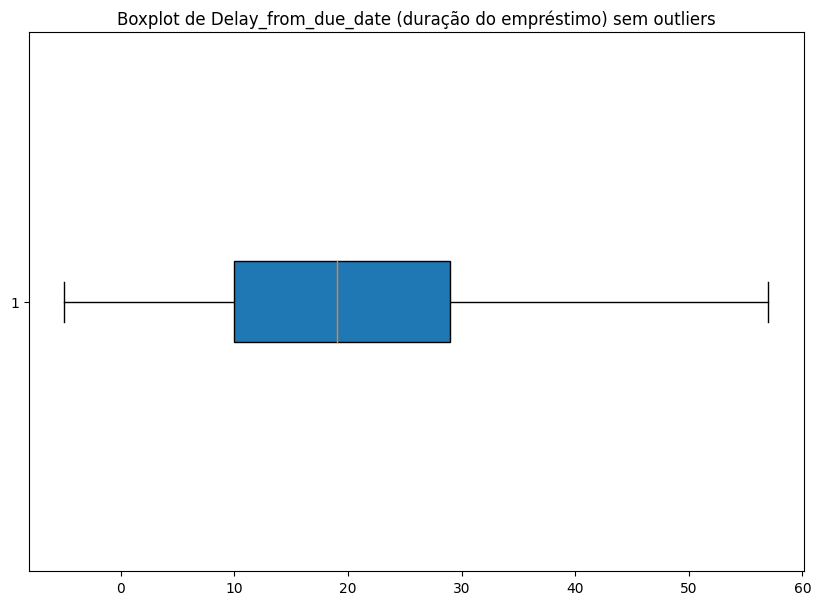

In [55]:
print('Mínimo ',cli_registros['Delay_from_due_date'].describe()[3])
print('25%', cli_registros['Delay_from_due_date'].describe()[4])
print('50%', cli_registros['Delay_from_due_date'].describe()[5])
print('75%', cli_registros['Delay_from_due_date'].describe()[6])
print('Máximo', cli_registros['Delay_from_due_date'].describe()[7])
print('Média', cli_registros['Delay_from_due_date'].describe()[1])

fig = plt.figure(figsize =(10, 7))
plt.title('Boxplot de Delay_from_due_date (duração do empréstimo) sem outliers')
plt.boxplot(cli_registros['Delay_from_due_date'],vert = False,patch_artist = True,showfliers=False)
plt.show()

In [56]:
cli_registros.groupby('Delay_from_due_date').count().loc[:,'ID'].rename("Qtde_de_amostras").sort_values(ascending=False)

Delay_from_due_date
 15    1932
 13    1690
 7     1684
 8     1670
 9     1661
       ... 
 65      29
-5       21
 66      19
-4       18
 67      13
Name: Qtde_de_amostras, Length: 73, dtype: int64

7. Variável Num_of_Delayed_Payment (número médio de pagamentos atrasados por pessoa)

In [57]:
cli_registros['Num_of_Delayed_Payment'].head(15)

0      7
6     8_
8      4
9      1
10    -1
12     1
13     0
15     4
16     8
20     5
21     6
23     6
24     6
25     3
26     9
Name: Num_of_Delayed_Payment, dtype: object

In [58]:
%%time
print("Retificando os valores")
for i, infos in cli_registros.iterrows():
  string_atraso_pag = infos['Num_of_Delayed_Payment'].replace('_','')
  cli_registros.loc[i,'Num_of_Delayed_Payment'] = string_atraso_pag

Retificando os valores
CPU times: user 37.2 s, sys: 61.6 ms, total: 37.3 s
Wall time: 37.3 s


In [59]:
cli_registros['Num_of_Delayed_Payment'] = cli_registros['Num_of_Delayed_Payment'].astype(int)
type(cli_registros['Num_of_Delayed_Payment'])

pandas.core.series.Series

In [60]:
cli_registros.groupby('Num_of_Delayed_Payment').count().loc[:,'ID'].rename("Qtde_de_amostras").sort_values(ascending=False)

Num_of_Delayed_Payment
19      3250
16      3193
17      3179
15      3100
20      3097
        ... 
2873       1
2875       1
2882       1
2896       1
2185       1
Name: Qtde_de_amostras, Length: 434, dtype: int64

In [ ]:
cli_registros.columns

9. Num_Credit_Inquiries (número de consultas ao cartão de crédito)

In [61]:
cli_registros['Num_Credit_Inquiries'].head(5)

0     4.0
6     4.0
8     2.0
9     2.0
10    2.0
Name: Num_Credit_Inquiries, dtype: float64

In [62]:
cli_registros['Num_Credit_Inquiries'].describe()

count    53049.000000
mean        27.062866
std        187.185825
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max       2594.000000
Name: Num_Credit_Inquiries, dtype: float64

In [63]:
cli_registros['Num_Credit_Inquiries'] = cli_registros['Num_Credit_Inquiries'].astype(int)
type(cli_registros['Num_Credit_Inquiries'])

pandas.core.series.Series

In [64]:
cli_registros.groupby('Num_Credit_Inquiries').count().loc[:,'ID'].rename("Qtde_de_amostras").sort_values(ascending=False)

Num_Credit_Inquiries
4       5719
7       4602
6       4577
8       4565
3       4365
        ... 
1607       1
1605       1
1603       1
1601       1
1286       1
Name: Qtde_de_amostras, Length: 747, dtype: int64

10. Outstanding_Debt (montante da dívida a pagar)

In [65]:
cli_registros['Outstanding_Debt'].head(30)

0      809.98
6      809.98
8      605.03
9      605.03
10     605.03
12     605.03
13     605.03
15     605.03
16    1303.01
20    1303.01
21    1303.01
23    1303.01
24     632.46
25     632.46
26     632.46
27     632.46
28     632.46
29     632.46
31     632.46
48     352.16
49     352.16
50     352.16
51     352.16
52     352.16
55     352.16
57    1704.18
59    1704.18
63    1704.18
65    1377.74
68    1377.74
Name: Outstanding_Debt, dtype: object

In [66]:
%%time
print("Retificando os valores")
for i, infos in cli_registros.iterrows():
  string_deb_pag = infos['Outstanding_Debt'].replace('_','')
  cli_registros.loc[i,'Outstanding_Debt'] = string_deb_pag

Retificando os valores
CPU times: user 38.7 s, sys: 17.8 ms, total: 38.8 s
Wall time: 38.8 s


In [67]:
cli_registros['Outstanding_Debt'] = cli_registros['Outstanding_Debt'].astype(float)
cli_registros['Outstanding_Debt'].describe()

count    53049.000000
mean      1507.116244
std       1187.144881
min          0.230000
25%        606.470000
50%       1240.450000
75%       2130.220000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

11. Credit_Score. Target

In [68]:
cli_registros['Credit_Score'].head(30)

0         Good
6         Good
8     Standard
9         Good
10    Standard
12        Good
13        Good
15        Good
16        Good
20        Good
21        Good
23    Standard
24    Standard
25    Standard
26    Standard
27    Standard
28    Standard
29    Standard
31    Standard
48        Good
49        Good
50        Good
51        Good
52        Good
55        Good
57        Poor
59        Poor
63        Poor
65        Good
68    Standard
Name: Credit_Score, dtype: object

In [69]:
cli_registros['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [70]:
agrupamento_pont_credito = cli_registros.groupby('Credit_Score').count().loc[:,'ID'].rename("Qtde_de_amostras").sort_values(ascending=False)
agrupamento_pont_credito

Credit_Score
Standard    27951
Poor        16516
Good         8582
Name: Qtde_de_amostras, dtype: int64

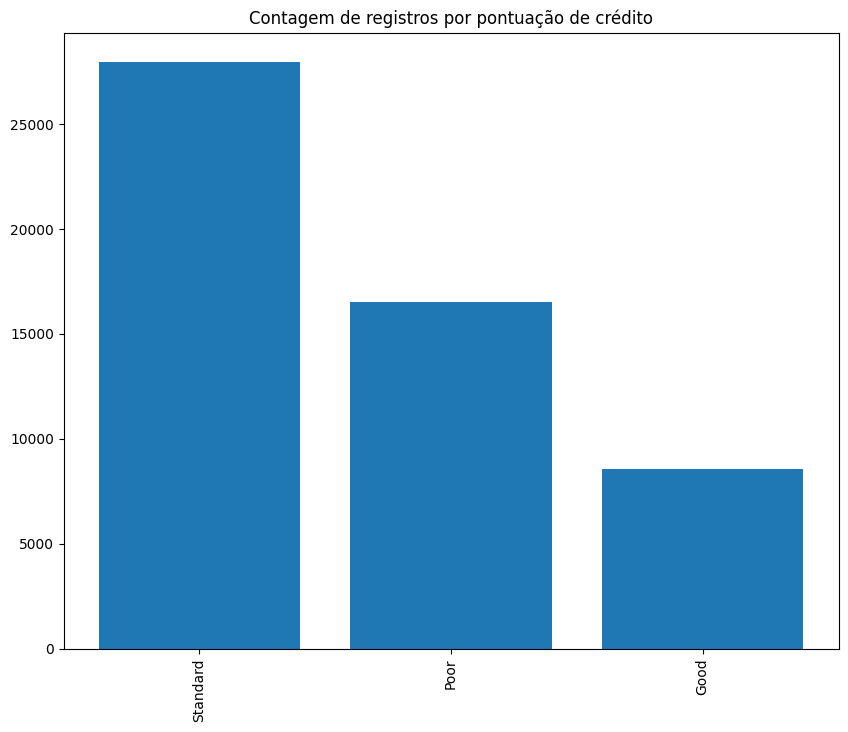

In [71]:
plt.figure(figsize = (10,8))
x = agrupamento_pont_credito.index
height = agrupamento_pont_credito.values
plt.bar(x, height)
plt.title('Contagem de registros por pontuação de crédito')
plt.xticks(rotation = 90)
plt.show()

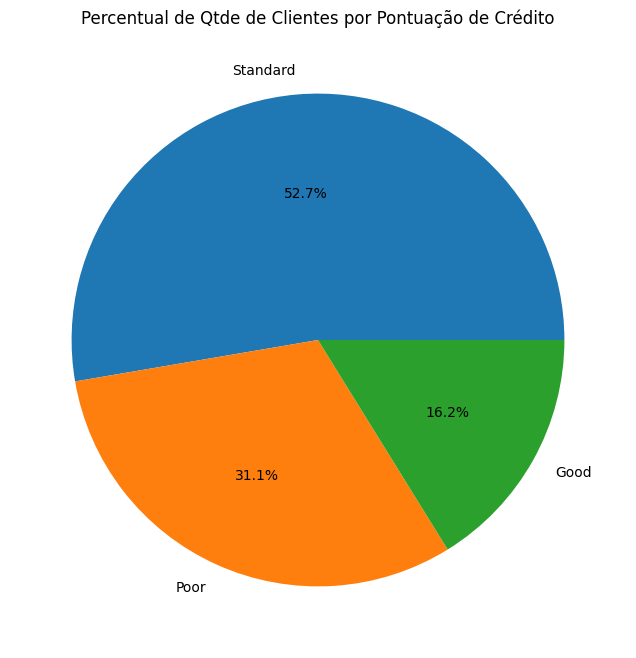

In [72]:
plt.figure(figsize = (10,8))
plt.title('Percentual de Qtde de Clientes por Pontuação de Crédito')
plt.pie(agrupamento_pont_credito.values, labels=agrupamento_pont_credito.index,autopct='%1.1f%%')
plt.show()

Tratando as variáveis categóricas e target

In [73]:
categoricas = ['Month','Occupation']

In [74]:
cli_registros_dummy = pd.get_dummies(cli_registros[categoricas])
cli_registros_dummy.columns

Index(['Month_April', 'Month_August', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Desconhecido', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer'],
      dtype='object')

In [75]:
cli_registros_dummy.head(5)

,Month_April,Month_August,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Occupation_Accountant,Occupation_Architect,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
# Exemplo: varíavel Occupation
cli_registros_dummy[['Occupation_Architect',
       'Occupation_Desconhecido', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']].head(5)

,Occupation_Architect,Occupation_Desconhecido,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [77]:
cli_registros['Occupation'].head(5)

0        Scientist
6        Scientist
8     Desconhecido
9          Teacher
10         Teacher
Name: Occupation, dtype: object

Tratando a variável TARGET

In [78]:
cli_registros['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [79]:
cli_registros_target = cli_registros['Credit_Score'].replace("Poor", 1)
cli_registros_target = cli_registros_target.replace("Standard", 2)
cli_registros_target = cli_registros_target.replace("Good", 3)
cli_registros_target = cli_registros_target.rename("Credit_Score").to_frame()

In [80]:
cli_registros_target

,Credit_Score
0,3
6,3
8,2
9,3
10,2
...,...
99994,1
99995,1
99996,1
99997,1


In [81]:
cli_registros_target['Credit_Score'].unique()

array([3, 2, 1])

In [82]:
# Avaliando o possível DESBALANÇEAMENTO entre CLASSES
cli_registros.groupby(['Credit_Score']).count()['ID']

Credit_Score
Good         8582
Poor        16516
Standard    27951
Name: ID, dtype: int64

In [ ]:
len(cli_registros_target)

In [ ]:
cli_registros.shape

In [ ]:
cli_registros_target.shape

In [ ]:
cli_registros_dummy.shape

In [83]:
# Juntando todos
cli_registros_features_target_tratado = pd.concat([cli_registros[['Monthly_Inhand_Salary',
                                                                  'Num_Bank_Accounts',
                                                                  'Delay_from_due_date',
                                                                  'Num_Credit_Inquiries',
                                                                  'Outstanding_Debt']],cli_registros_dummy, cli_registros_target],axis=1)
cli_registros_features_target_tratado

,Monthly_Inhand_Salary,Num_Bank_Accounts,Delay_from_due_date,Num_Credit_Inquiries,Outstanding_Debt,Month_April,Month_August,Month_February,Month_January,Month_July,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Score
0,1824.843333,3,3,4,809.98,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,3
6,1824.843333,3,3,4,809.98,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
8,3037.986667,2,3,2,605.03,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
9,3037.986667,2,7,2,605.03,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3
10,3037.986667,2,3,2,605.03,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,3359.415833,4,20,3,502.38,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
99995,3359.415833,4,23,3,502.38,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
99996,3359.415833,4,18,3,502.38,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
99997,3359.415833,4,27,3,502.38,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [84]:
cli_registros_features_target_tratado.columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Delay_from_due_date',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Month_April',
       'Month_August', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Desconhecido',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Score'],
      dtype='object')

Divisão entre Dados de Treino e Teste

In [ ]:
cli_registros.shape

In [ ]:
cli_registros.columns

In [ ]:
cli_registros_features_target_tratado

In [85]:
X_train, X_test, y_train, y_test = train_test_split(cli_registros_features_target_tratado.loc[:,cli_registros_features_target_tratado.columns != 'Credit_Score'], 
                                                    cli_registros_features_target_tratado.loc[:,'Credit_Score'], test_size=0.33, random_state = 42)

In [86]:
total_amostra = len(cli_registros_features_target_tratado)
print('Qtde total da amostra ',total_amostra)
print("Qtde de amostras de treino ",len(X_train))
print("Qtde de amostras de teste ",len(X_test))
print("% Qtde de amostras de treino ",len(X_train)/total_amostra * 100)
print("% Qtde de amostras de teste ",len(X_test)/total_amostra * 100)

Qtde total da amostra  53049
Qtde de amostras de treino  35542
Qtde de amostras de teste  17507
% Qtde de amostras de treino  66.99843540877302
% Qtde de amostras de teste  33.00156459122698


Treinamento do Modelo

In [87]:
%%time
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_treinado = modelo.fit(X_train,y_train)
print('Modelo treinado')

Modelo treinado
CPU times: user 81.8 ms, sys: 72 µs, total: 81.9 ms
Wall time: 93.3 ms


In [88]:
# Previsões - dados de teste
previsoes_teste = modelo_treinado.predict(X_test)
previsoes_teste[0:5]

array([1, 2, 2, 2, 2])

In [89]:
# Previsões - dados de treino
previsoes_treino = modelo_treinado.predict(X_train)
previsoes_treino[0:5]

array([1, 1, 3, 2, 2])

Avaliação

In [90]:
print("Avaliando dados de TESTE")
target_names = ['1 Poor','2 Standard','3 Good']
y_true = y_test
y_pred = previsoes_teste
print(classification_report(y_true, y_pred, target_names=target_names))

Avaliando dados de TESTE
              precision    recall  f1-score   support

      1 Poor       0.70      0.59      0.64      5504
  2 Standard       0.64      0.79      0.71      9173
      3 Good       0.55      0.31      0.40      2830

    accuracy                           0.65     17507
   macro avg       0.63      0.56      0.58     17507
weighted avg       0.65      0.65      0.64     17507



In [91]:
print("Avaliando dados de TREINAMENTO")
target_names = ['1 Poor','2 Standard','3 Good']
y_true = y_train
y_pred = previsoes_treino
print(classification_report(y_true, y_pred, target_names=target_names))

Avaliando dados de TREINAMENTO
              precision    recall  f1-score   support

      1 Poor       0.70      0.59      0.64     11012
  2 Standard       0.65      0.79      0.71     18778
      3 Good       0.51      0.29      0.37      5752

    accuracy                           0.65     35542
   macro avg       0.62      0.56      0.57     35542
weighted avg       0.64      0.65      0.63     35542

